## Homework 3 - Building Functions and Visualizing Distributions

Like in-class, lets start by building our functions

In [1]:
def total(list_obj):
    total = 0
    for val in list_obj:
        total += val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
import pandas as pd
def gather_statistics(df, sample = True):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val.dropna(axis=0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df
           

In [3]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-11-01 13:02:15.732760


In [4]:
data_dict = {}
stocks = ["TM", "GM", "F", "HMC"]
# For our four stocks lets look at some of the largest automobile manufacturers: Toyota, General Motors, Ford, and Honda
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [5]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,31.410000,31.110001,31.180000,31.340000,1334000.0,31.190945
2012-01-04,31.809999,31.549999,31.650000,31.600000,409400.0,31.449707
2012-01-05,32.000000,31.610001,31.650000,31.879999,437500.0,31.728374
2012-01-06,32.189999,31.740000,31.990000,32.130001,585500.0,31.977188
2012-01-09,32.189999,31.860001,32.099998,32.049999,537300.0,31.897566
...,...,...,...,...,...,...
2021-10-26,30.000000,29.530001,30.000000,29.559999,943400.0,29.559999
2021-10-27,29.570000,29.180000,29.570000,29.190001,1016700.0,29.190001
2021-10-28,29.820000,29.510000,29.520000,29.700001,940400.0,29.700001


In [6]:
data_dict.keys()

dict_keys(['TM', 'GM', 'F', 'HMC'])

In [7]:
data_dict.values()

dict_values([                  High         Low        Open       Close    Volume  \
Date                                                                   
2012-01-03   67.900002   67.309998   67.389999   67.779999  377100.0   
2012-01-04   68.680000   68.070000   68.230003   68.430000  501600.0   
2012-01-05   68.830002   68.370003   68.500000   68.620003  343700.0   
2012-01-06   68.599998   68.220001   68.519997   68.510002  212000.0   
2012-01-09   68.709999   68.220001   68.500000   68.419998  301700.0   
...                ...         ...         ...         ...       ...   
2021-10-26  174.789993  172.809998  173.630005  173.199997  145400.0   
2021-10-27  175.289993  174.009995  174.809998  174.089996  205500.0   
2021-10-28  176.479996  175.289993  175.289993  176.479996  181400.0   
2021-10-29  176.690002  175.619995  176.199997  176.570007  164800.0   
2021-11-01  179.804993  178.179993  178.130005  179.559998  140850.0   

             Adj Close  
Date                    


In [8]:
for val in data_dict.values():
    print(val["Close"])

Date
2012-01-03     67.779999
2012-01-04     68.430000
2012-01-05     68.620003
2012-01-06     68.510002
2012-01-09     68.419998
                 ...    
2021-10-26    173.199997
2021-10-27    174.089996
2021-10-28    176.479996
2021-10-29    176.570007
2021-11-01    179.559998
Name: Close, Length: 2475, dtype: float64
Date
2012-01-03    21.049999
2012-01-04    21.150000
2012-01-05    22.170000
2012-01-06    22.920000
2012-01-09    22.840000
                ...    
2021-10-26    57.369999
2021-10-27    54.259998
2021-10-28    54.240002
2021-10-29    54.430000
2021-11-01    55.450001
Name: Close, Length: 2475, dtype: float64
Date
2012-01-03    11.130000
2012-01-04    11.300000
2012-01-05    11.590000
2012-01-06    11.710000
2012-01-09    11.800000
                ...    
2021-10-26    15.940000
2021-10-27    15.510000
2021-10-28    16.860001
2021-10-29    17.080000
2021-11-01    17.863400
Name: Close, Length: 2475, dtype: float64
Date
2012-01-03    31.340000
2012-01-04    31.600000
201

In [9]:
close_data = pd.concat((df["Close"] for df in data_dict.values()),
                      keys = data_dict.keys(),
                       axis = 1)
close_data

,TM,GM,F,HMC
Date,,,,
2012-01-03,67.779999,21.049999,11.130000,31.340000
2012-01-04,68.430000,21.150000,11.300000,31.600000
2012-01-05,68.620003,22.170000,11.590000,31.879999
2012-01-06,68.510002,22.920000,11.710000,32.130001
2012-01-09,68.419998,22.840000,11.800000,32.049999
...,...,...,...,...
2021-10-26,173.199997,57.369999,15.940000,29.559999
2021-10-27,174.089996,54.259998,15.510000,29.190001
2021-10-28,176.479996,54.240002,16.860001,29.700001


### Visualizing Auto Manufacturer's Toyota, General Motors, Ford, and Honda's Daily Stock Prices at Close

Text(0.5, 1.0, 'Daily Stock Prices at Close')

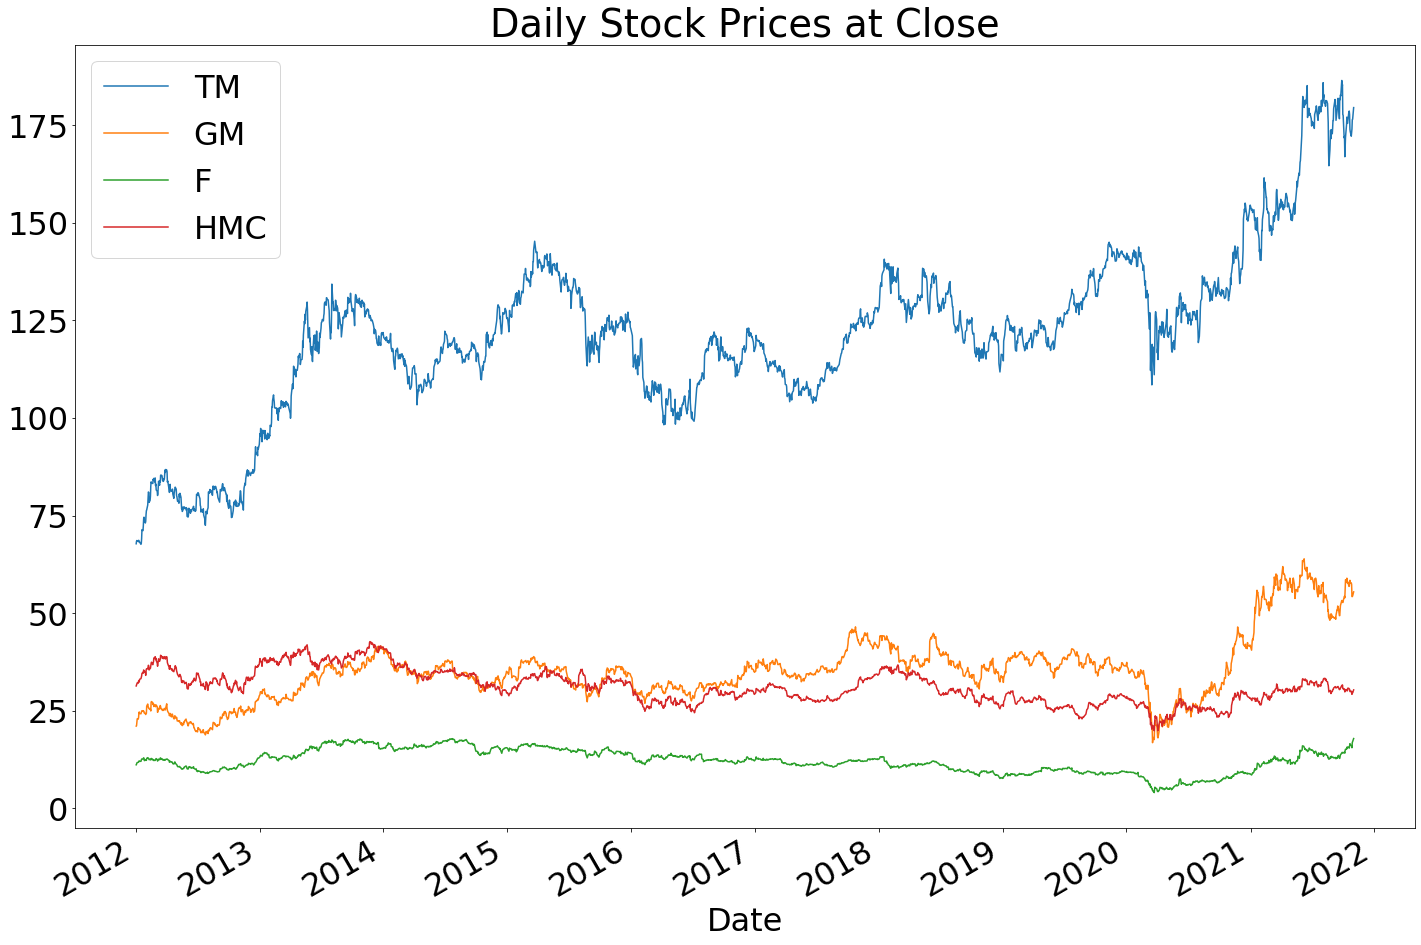

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices at Close")

Like in class lets format our vizulations better

<ipython-input-11-d4c9c95dd953>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


[Text(0, 0.0, '0.0'),
 Text(0, 25.0, '25'),
 Text(0, 50.0, '50'),
 Text(0, 75.0, '75'),
 Text(0, 100.0, '100'),
 Text(0, 125.0, '125'),
 Text(0, 150.0, '150'),
 Text(0, 175.0, '175'),
 Text(0, 200.0, '200')]

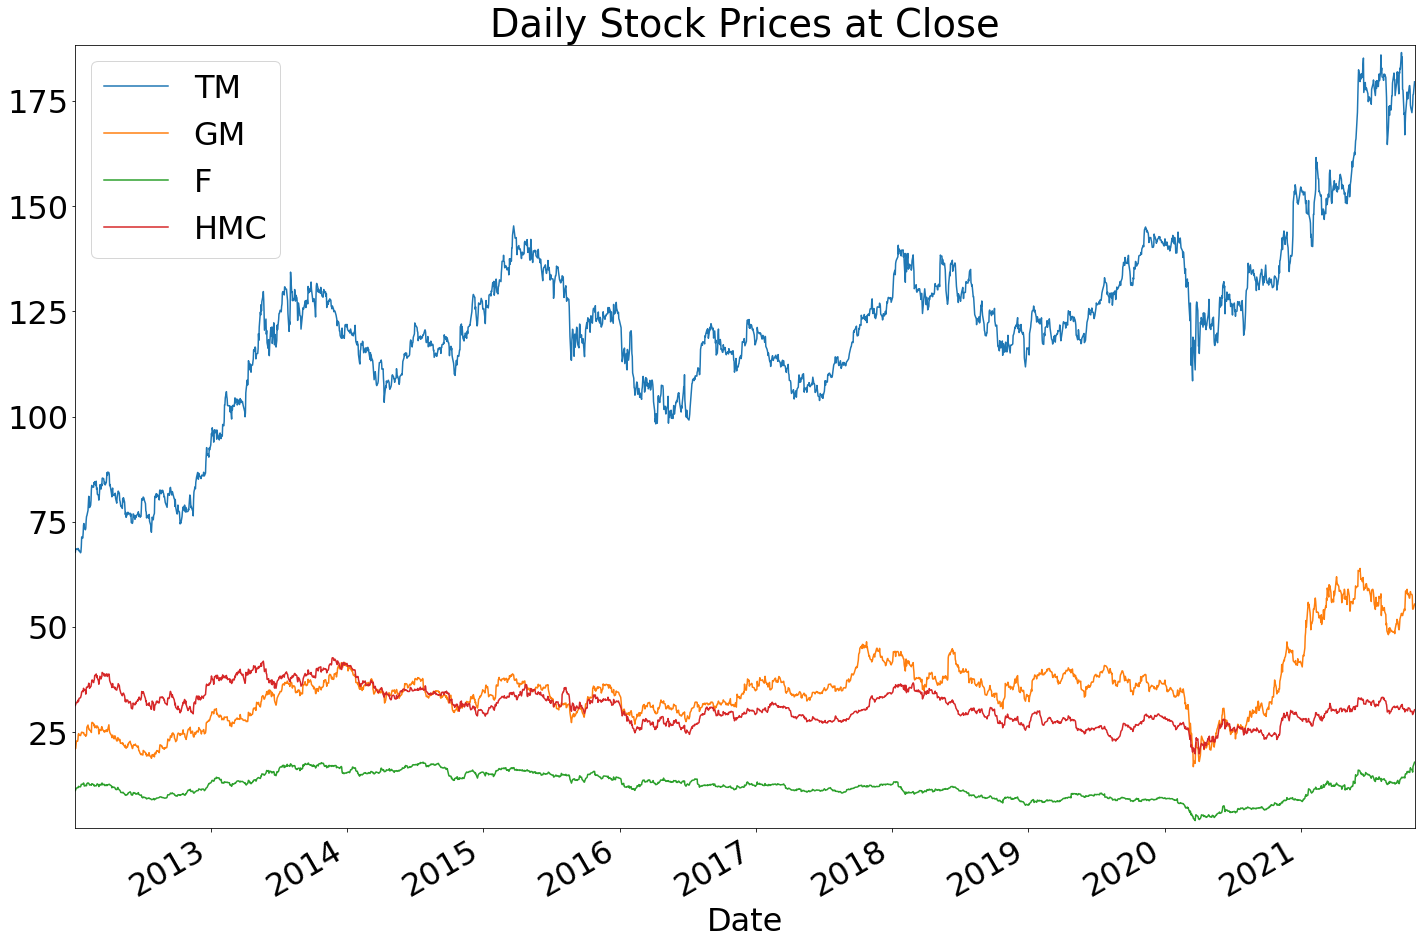

In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01  

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices at Close")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])

Now lets view this data in precentage changes

In [12]:
price_change_data = close_data.pct_change() * 100
price_change_data

,TM,GM,F,HMC
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.958987,0.475061,1.527404,0.829611
2012-01-05,0.277660,4.822697,2.566371,0.886072
2012-01-06,-0.160304,3.382950,1.035374,0.784197
2012-01-09,-0.131373,-0.349040,0.768575,-0.248994
...,...,...,...,...
2021-10-26,0.563201,-0.675207,-0.375003,-1.466668
2021-10-27,0.513856,-5.420953,-2.697612,-1.251688
2021-10-28,1.372853,-0.036853,8.704064,1.747174


<ipython-input-13-67fd3941e78c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels((str(int(y)) + "%" for y in y_vals))


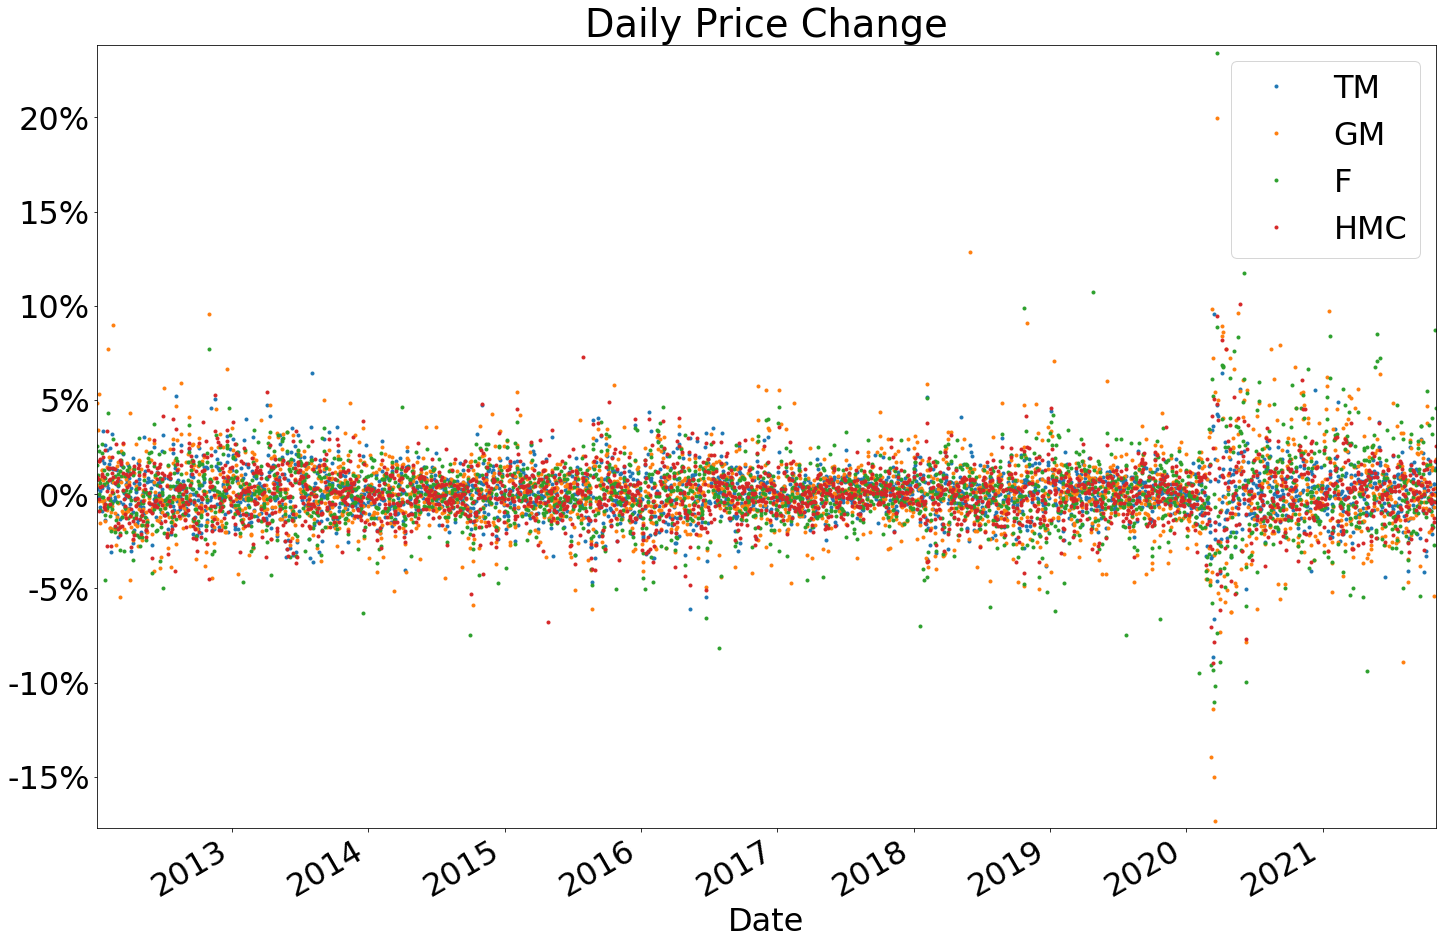

In [13]:
plt.rcParams.update({'font.size':32})
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = " ", marker = ".",
                                     ax = ax, legend = True)
    
y_vals = ax.get_yticks()
ax.set_yticklabels((str(int(y)) + "%" for y in y_vals))
plt.title("Daily Price Change")
plt.show()
plt.close()

In [14]:
stats_df = gather_statistics(price_change_data,
                             sample = True)
stats_df

,TM,GM,F,HMC
mean,0.048,0.060,0.038,0.010
median,0.024,0.029,0.000,0.033
variance,1.698,4.255,3.761,2.201
S.D.,1.303,2.063,1.939,1.484
skewness,0.163,0.277,0.675,0.147
kurtosis,3.957,10.146,13.010,4.268


## Looking at one company in detail

Lets look at a company more in-depth, we will do a more detailed analysis of Toyota's stock price changes

<ipython-input-15-21d899370f91>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


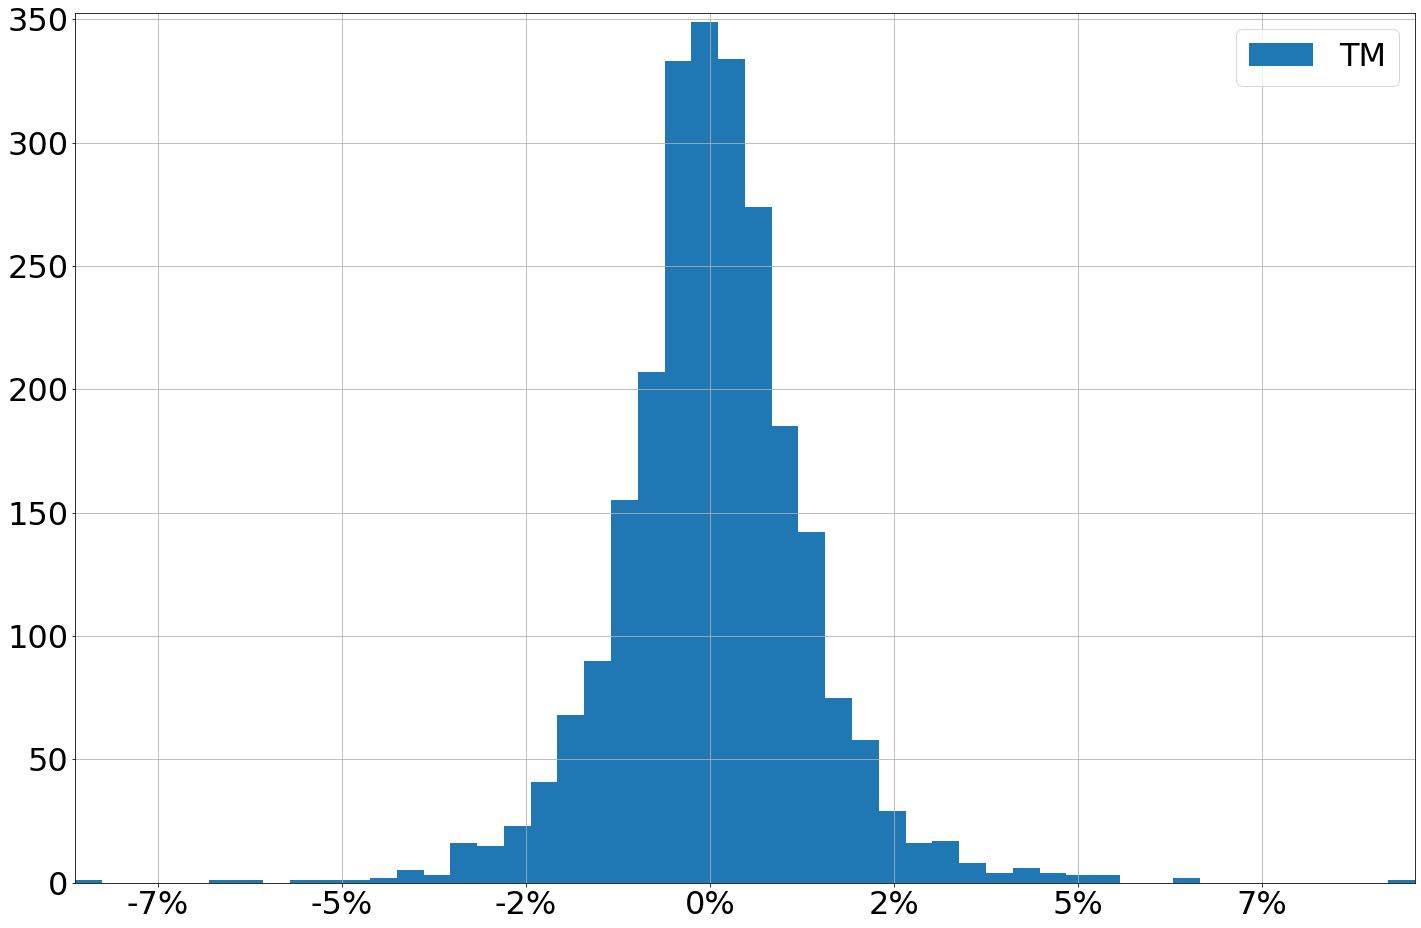

In [15]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["TM"].hist(bins = 50, label = "TM")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()
plt.show()

<ipython-input-16-d22eda62560e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-16-d22eda62560e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


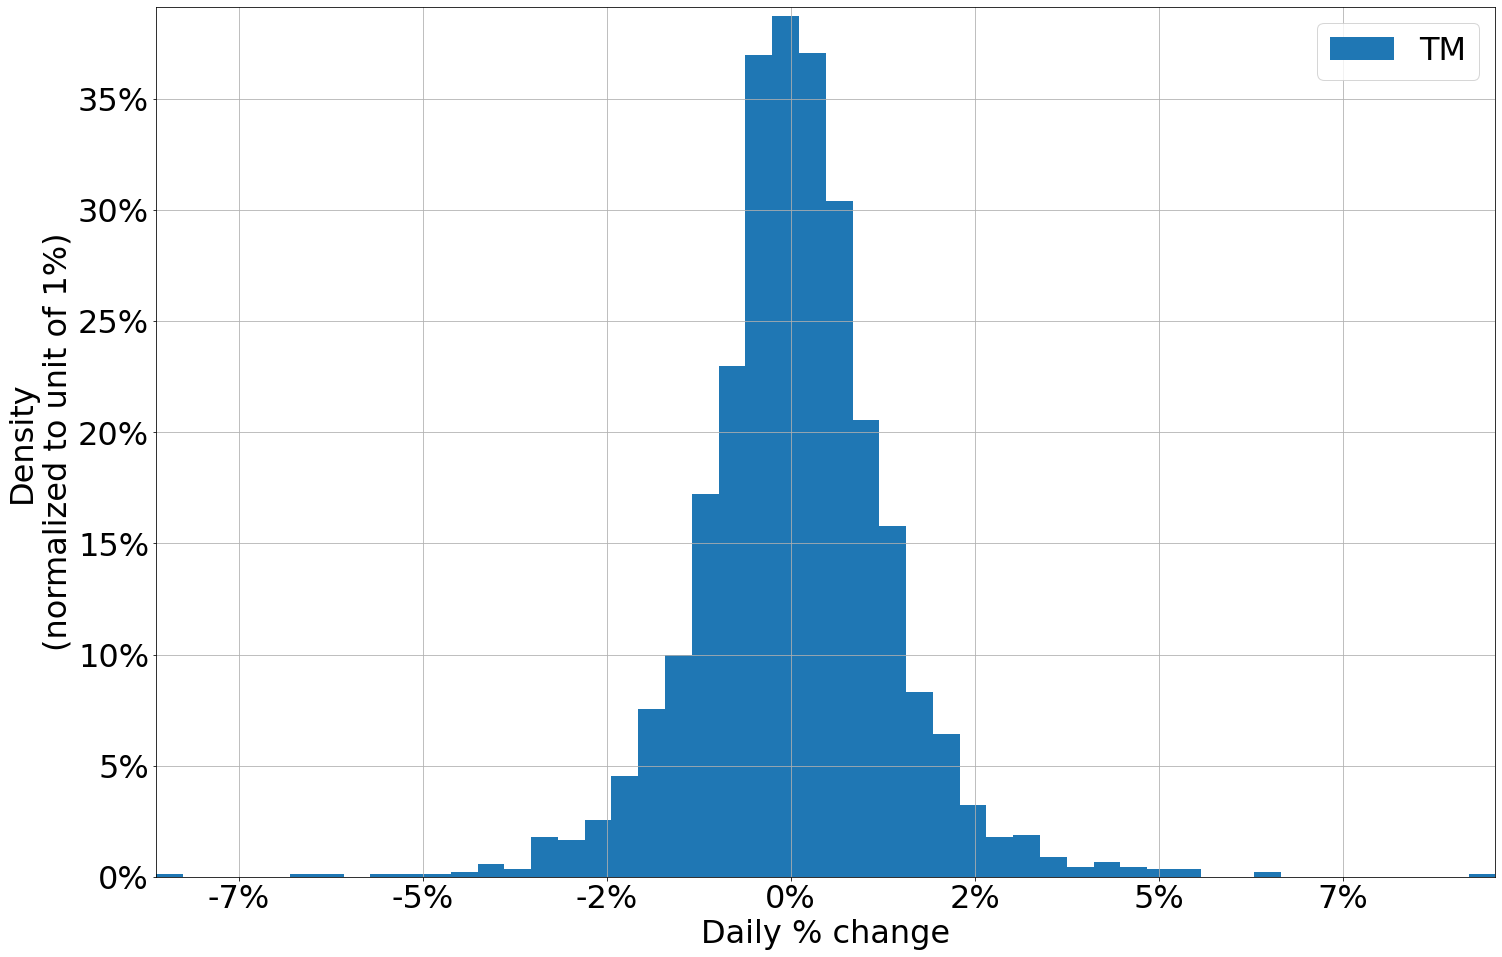

In [16]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["TM"].hist(bins = 50,
                               density = True,
                               label = "TM")


x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
ax.set_xlabel("Daily % change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

Now lets look at all companies again

array([<AxesSubplot:title={'center':'TM'}>,
       <AxesSubplot:title={'center':'GM'}>,
       <AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'HMC'}>], dtype=object)

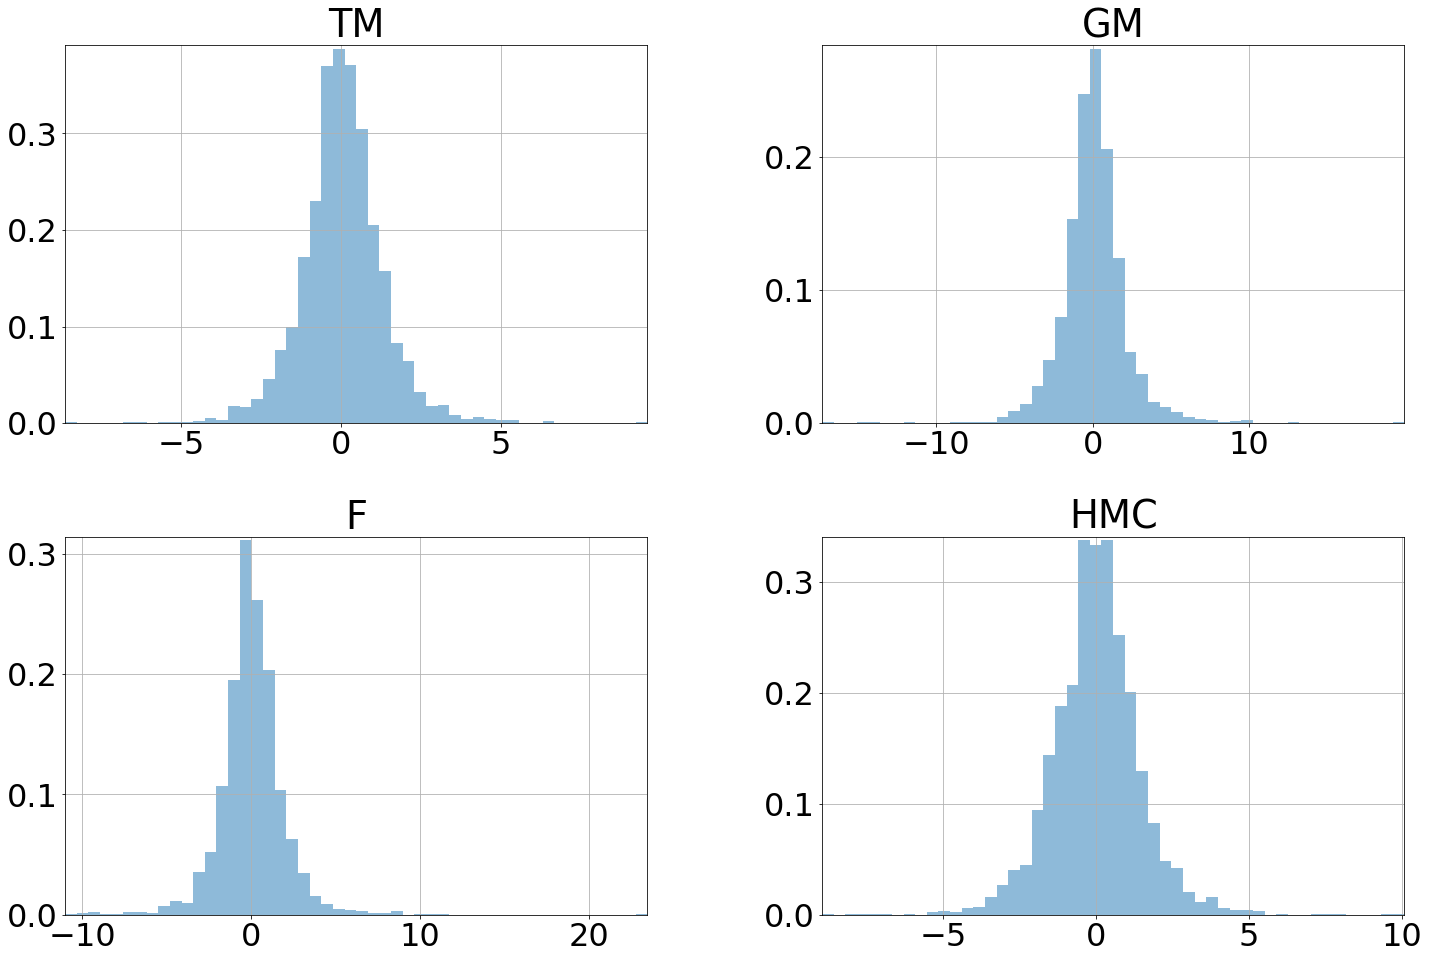

In [17]:
fig, ax = plt.subplots(2,2, figsize =(24,16))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

Now lets make this visualzation more useful and readable

<ipython-input-18-6c4ec3a3775e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-18-6c4ec3a3775e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


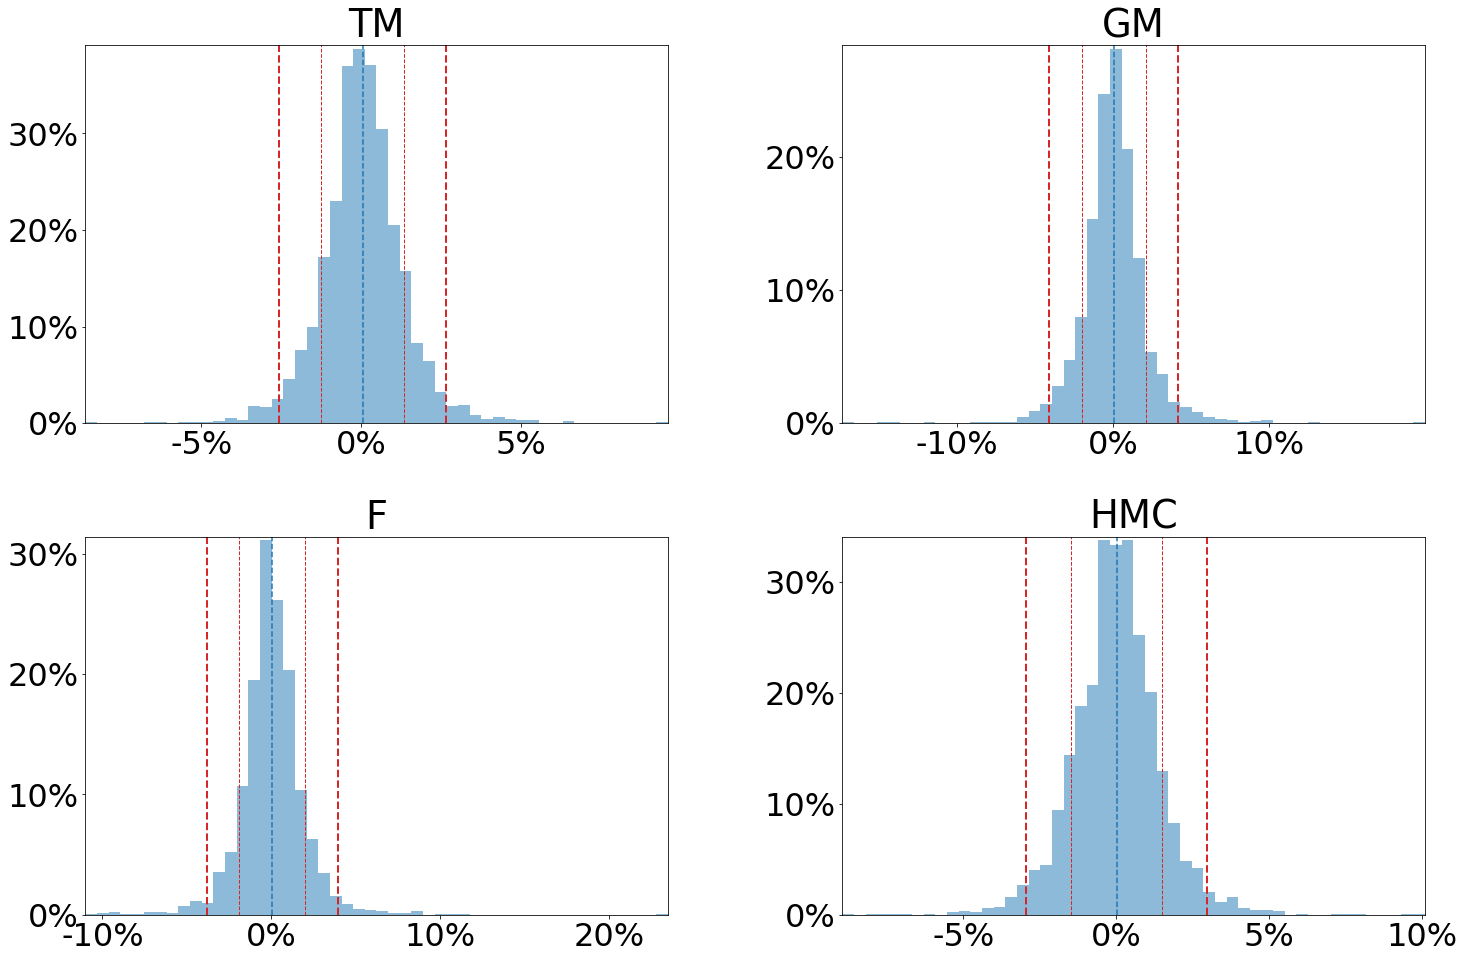

In [18]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        a.set_title(stock)
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")
        num_SDs = 2
        for num in range(1,num_SDs+1):
            a.axvline(x = hist_data.loc["mean"]+hist_data.loc["S.D."] *num ,
                      color = "C3",
                      ls="--",
                     lw = num)
            a.axvline(x = hist_data.loc["mean"]-hist_data.loc["S.D."] *num, 
                      ls="--",
                     color = "C3",
                     lw = num)

<ipython-input-19-43328bab23ba>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-19-43328bab23ba>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


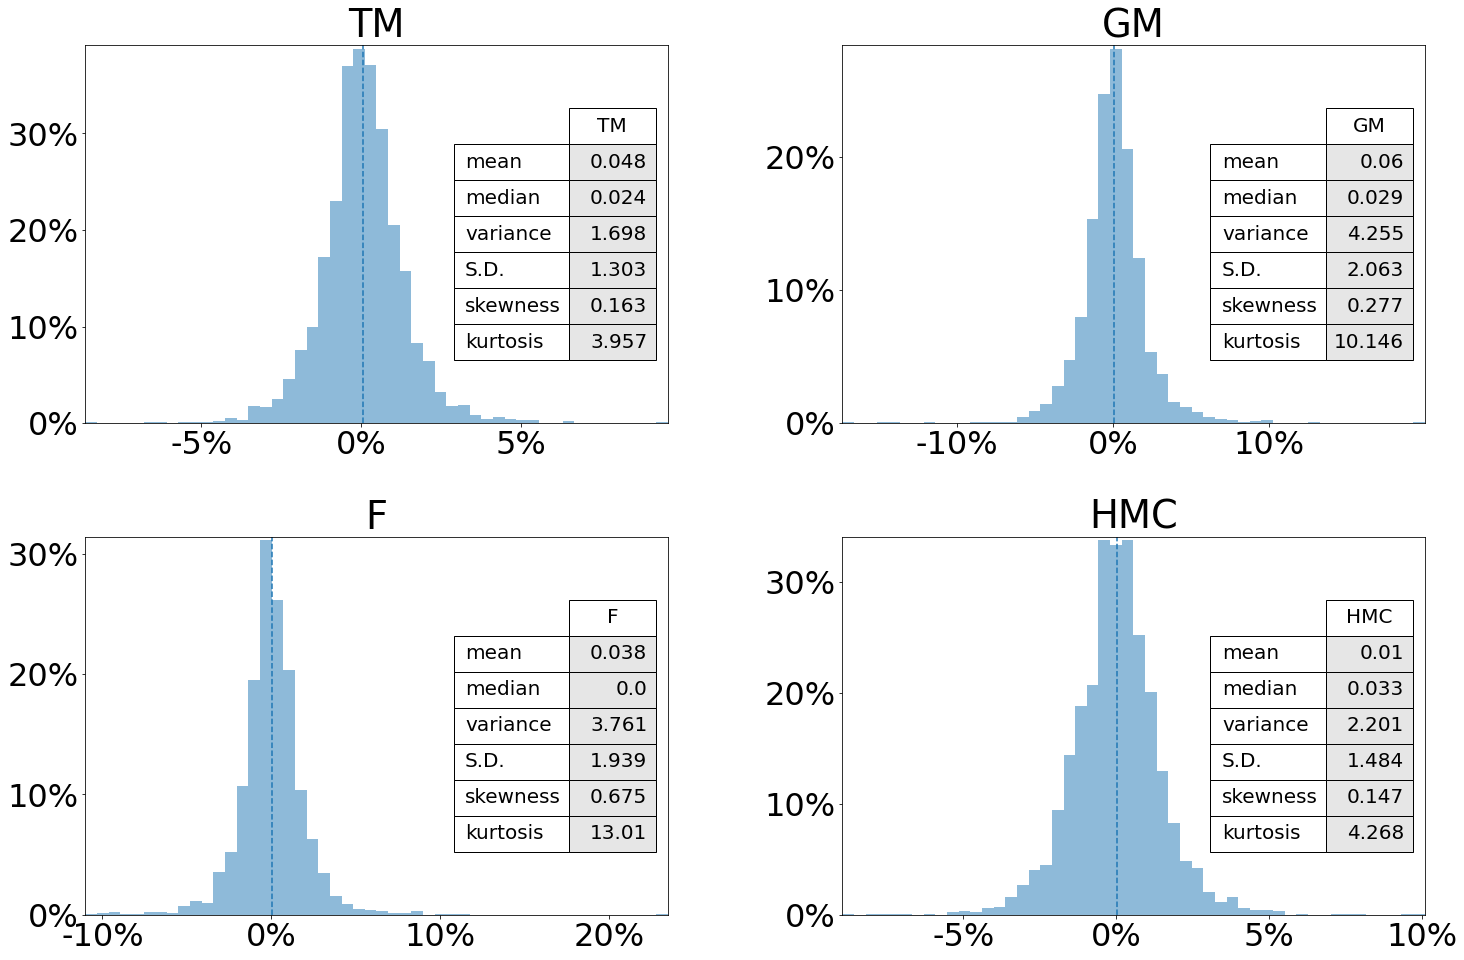

In [19]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        a.set_title(stock)
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")

        
        stats_table = table(a, 
                      hist_data,
                     colWidths=[.1],
                     cellColours=[[(.9,.9,.9)]]*6,
                     loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)

Now lets plot all of these on a single graph

<ipython-input-20-41efd679a913>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-20-41efd679a913>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


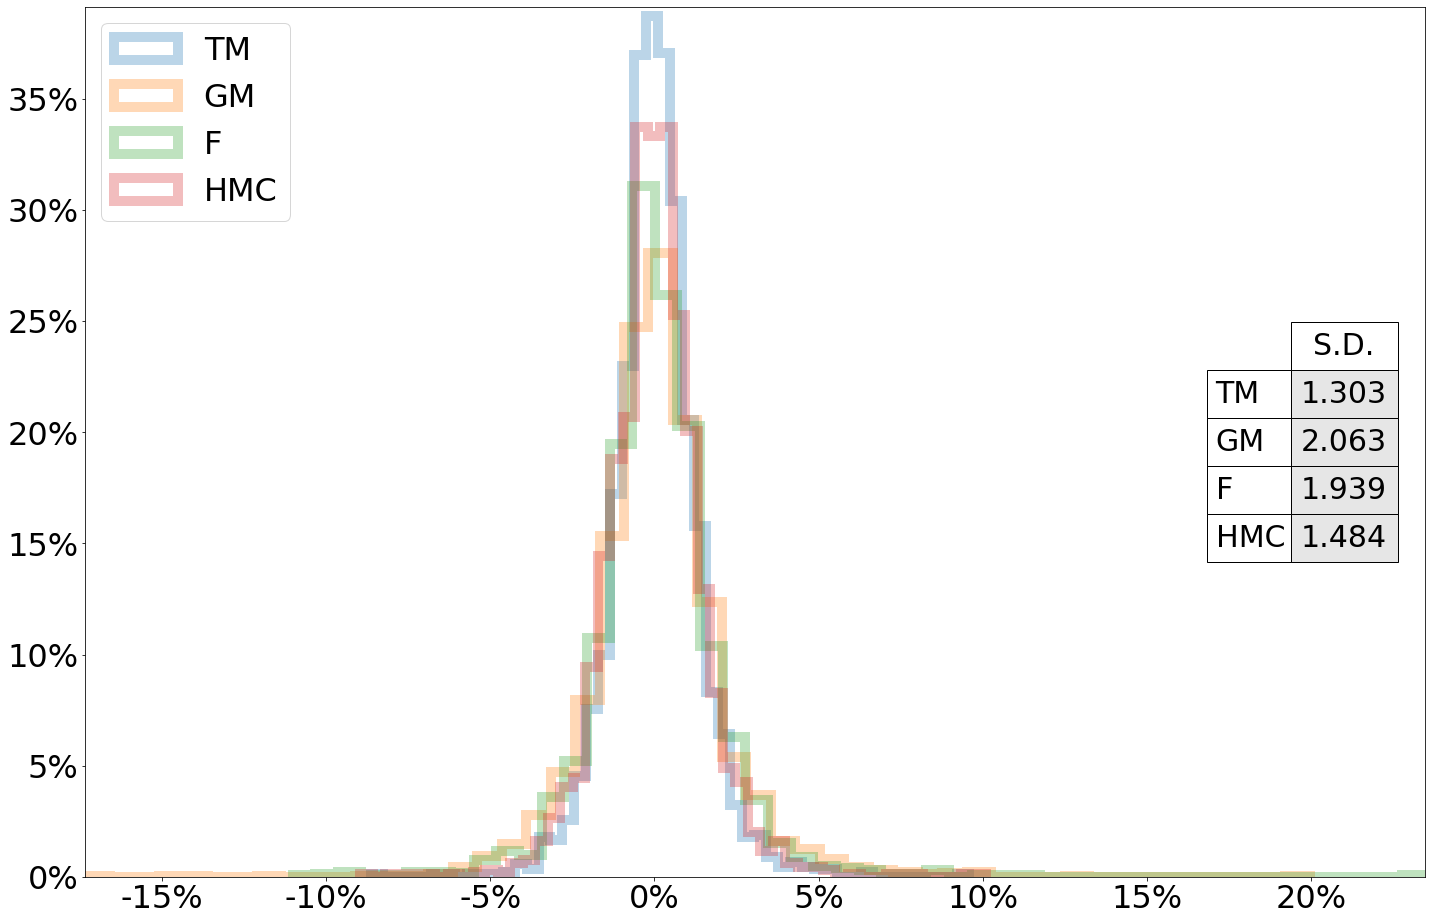

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

<ipython-input-21-76e17e20f821>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-21-76e17e20f821>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


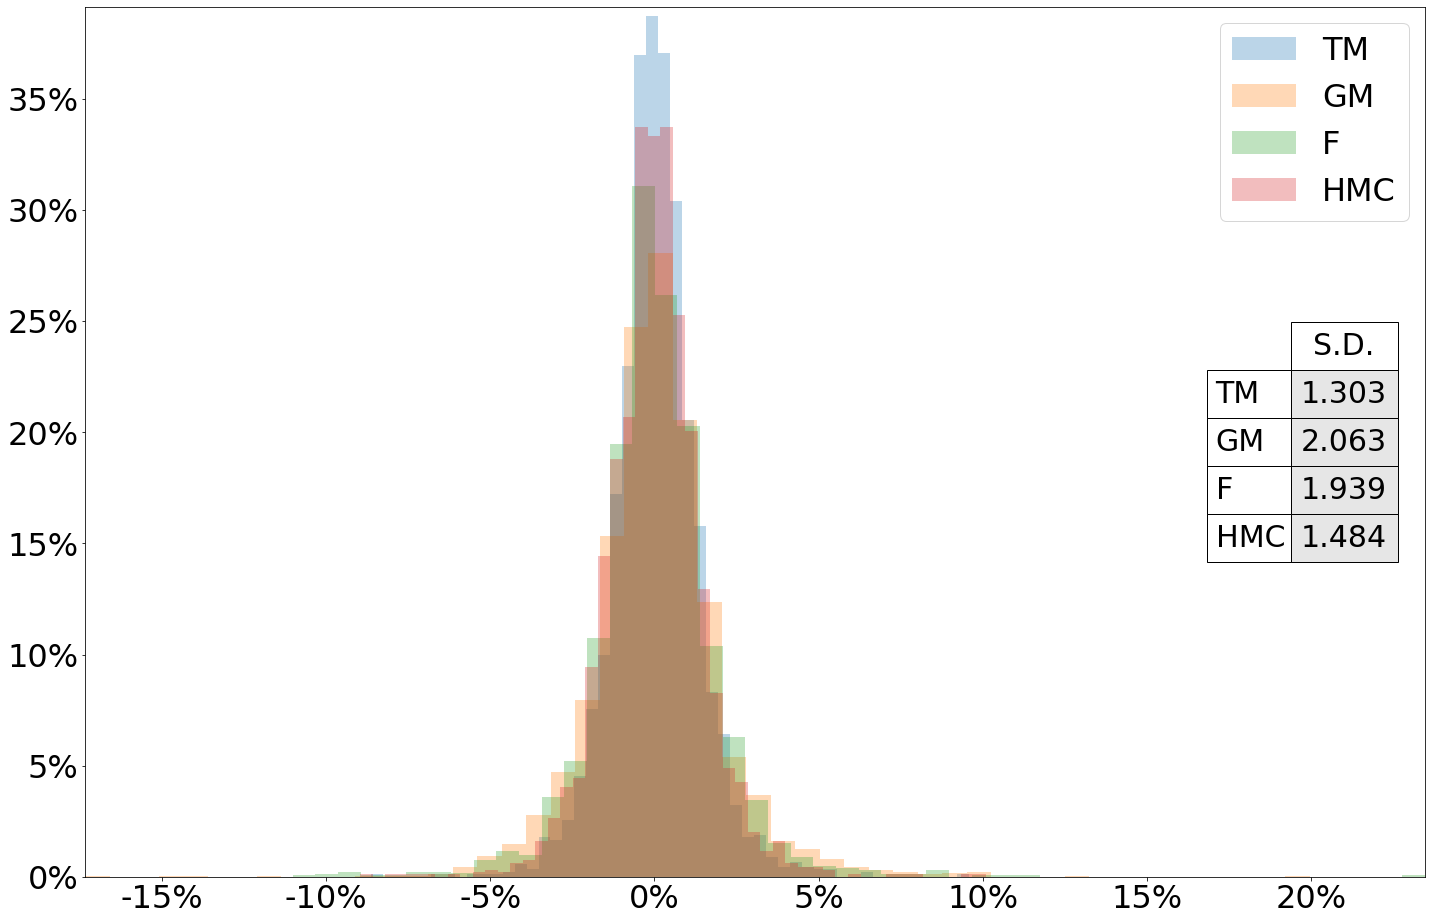

In [21]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

End of Homework 3